In [1]:
from environment import NormalMoveEnv
from experiment import Trajectory
from nn import BetaModel, Model, GeneralModel
from rl import Agent

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

# Env

In [2]:
walls=[
    ([-8.,-1.],[10., 1.]), # horozontal
    ([3.,3.],[5., 10.]) # Vertical
]
goal=[([5.,8.],[10.,10.])]

env = NormalMoveEnv(goals=goal, walls=walls)

s = env.reset()
print(s)
print(env.step(0))

# ax = env.plot()

[-1.61431119 -4.45216775]
(array([-0.6085659, -4.4399724], dtype=float32), True, False)


# Trajectory

<AxesSubplot: >

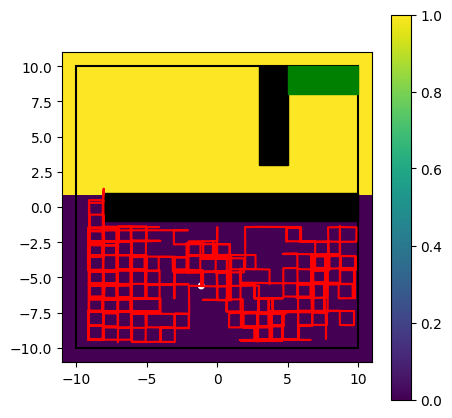

In [3]:
t = Trajectory(env, size=1_000)
ax = t.plot(env.plot())
ax

# NN Model

2680.044648932284 -373.6943138077779


array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

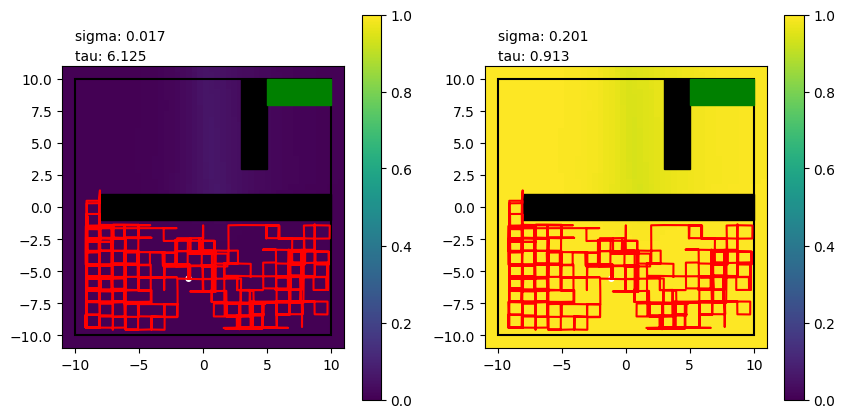

In [10]:
m = Model(env, k=2, lr=1e-5, momentum=.9)

ll = m.batch_train(t.run, 1_000)
print(ll[0], ll[-1])

_, ax = plt.subplots(ncols=m.k, figsize=(m.k*5, 5))
for k in range(m.k):
    ax[k] = env.plot(ax[k], background=False)
    ax[k] = t.plot(ax[k])
m.plot(ax)

2562.2849225760556 -654.6779046592342


array([<AxesSubplot: title={'center': 'theta_0'}>,
       <AxesSubplot: title={'center': 'theta_1'}>], dtype=object)

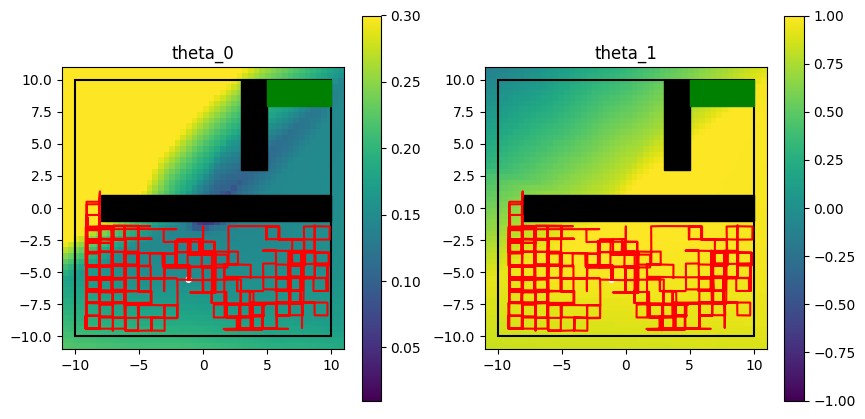

In [9]:
m = GeneralModel(env, k=2, lr=1e-6, momentum=.9)

ll = m.batch_train(t.run, 1_000)
print(ll[0], ll[-1])


_, ax = plt.subplots(ncols=m.k, figsize=(m.k*5, 5))
for k in range(m.k):
    ax[k] = env.plot(ax[k], background=False)
    ax[k] = t.plot(ax[k])
m.plot(ax)